# Network models generation

@Liubov, Marc

Parts of a course: 
0. Reminder from the last course class 2 
1. Deterministic network models 
2. Random network generation


Modeling of processes:
3. Random walk model 
4. Mobility hints (notebook Chakresh)

Most of the materials are described in the networkx documentation https://networkx.github.io/documentation/stable/reference/generators.html 

## Degree distributions 

In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# download network from https://snap.stanford.edu/data/ 



# Test yourself

Download and choose any network from https://snap.stanford.edu/data/ and plot degree distribution


Name: 
Type: Graph
Number of nodes: 12
Number of edges: 17
Average degree:   2.8333


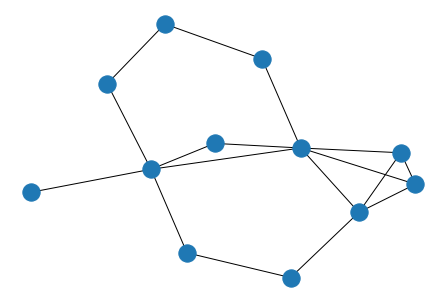

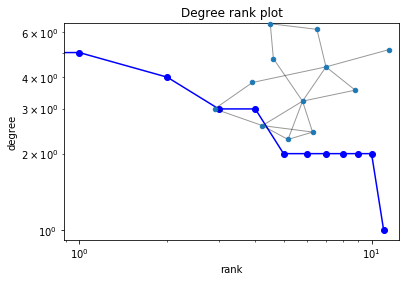

In [9]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
%matplotlib inline

# example from class 2
with open('files/small_network_nodes.csv', 'r') as nodecsv:
    nodereader = csv.reader(nodecsv)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes]

with open('files/small_network_edges.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader][1:] # the [1:] is only if first line is heading

           
# now let us use networkx 
# graph creation of networkx object
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
nx.draw(G)
plt.plot()
print(nx.info(G))
plt.show()

# let us plot degree distribution 



degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)


plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

plt.show()




# 1. Classes of networks
We start we several classes of random networks. The simplest one is complete graph. 

We will use main algorithm for network generation and plotting
1. We first generate a network using networkx classes
2. Then we visualise this network with the simplest function "draw" https://networkx.github.io/documentation/stable/reference/drawing.html 


# Try yourself 
Try different parameters of your random and deterministic networks.

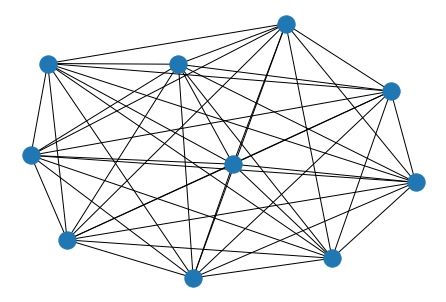

In [11]:
# 1. Generate a network
N=10
G = nx.complete_graph(N)

# 2. Draw using the preassigned layout
nx.draw(G)



## Classes of networks
Networkx classes
https://networkx.github.io/documentation/stable/reference/generators.html 

Other pre-assigned network classes return:

1. balanced_tree(r, h[, create_using]), the perfectly balanced r-ary tree of height h.
2. barbell_graph(m1, m2[, create_using]), the Barbell Graph: two complete graphs connected by a path.
3. binomial_tree(n), the Binomial Tree of order n.
4. complete_graph(n[, create_using]), the complete graph K_n with n nodes.
5. complete_multipartite_graph(*subset_sizes), the complete multipartite graph with the specified subset sizes.
6. circular_ladder_graph(n[, create_using]), the circular ladder graph \(CL_n\) of length n.
7. circulant_graph(n, offsets[, create_using]), the circulant graph \(Ci_n(x_1, x_2, ..., x_m)\) with \(n\) vertices.
8. cycle_graph(n[, create_using]), the cycle graph \(C_n\) of cyclically connected nodes.
9. dorogovtsev_goltsev_mendes_graph(n[, …]), the hierarchically constructed Dorogovtsev-Goltsev-Mendes graph.
10. empty_graph([n, create_using, default]), the empty graph with n nodes and zero edges.
11. full_rary_tree(r, n[, create_using]), a full r-ary tree of n vertices.
12. ladder_graph(n[, create_using]), the Ladder graph of length n.
13. lollipop_graph(m, n[, create_using]), the Lollipop Graph; K_m connected to P_n.
14. path_graph(n[, create_using]),  the Path graph P_n of linearly connected nodes.
15. star_graph(n[, create_using]), the star graph
16. trivial_graph([create_using]), the Trivial graph with one node (with label 0) and no edges.
17. turan_graph(n, r), the Turan Graph
18. wheel_graph(n[, create_using]), the wheel graph



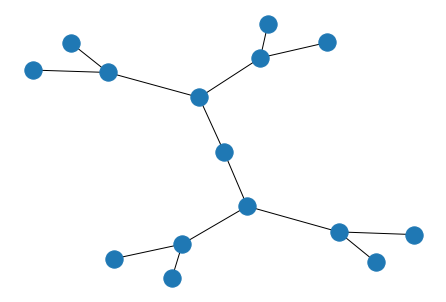

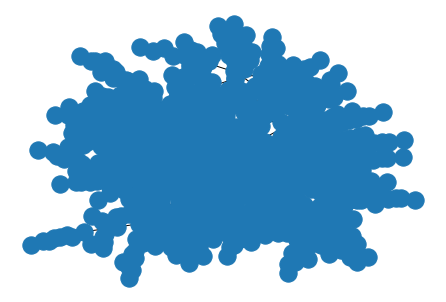

In [15]:
import networkx as nx
r = 2
h = 3
G = nx.balanced_tree(r, h)
nx.draw(G)
plt.show()

n = 10 
G = nx.binomial_tree(n)
nx.draw(G)
plt.show()

#n=50
#G = nx.dorogovtsev_goltsev_mendes_graph(n)
#plt.show(G)

## Random networks generation

#### Erdoc-Renyi network

More about random networks you can read here: 
https://en.wikipedia.org/wiki/Random_graph

We also explain it later in the course slides: https://github.com/Big-data-course-CRI/materials_big_data_cri_2019/tree/master/slides

You can also use resources from Barabasi book on network science: http://networksciencebook.com/



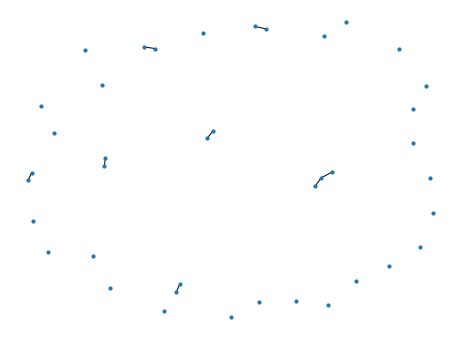

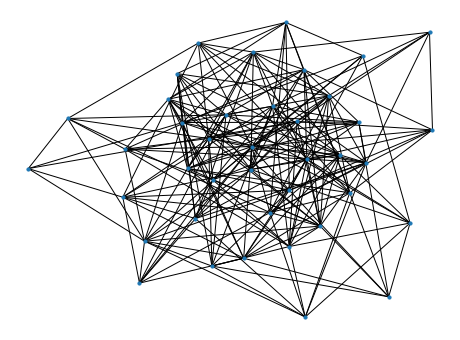

In [16]:
import networkx as nx
import matplotlib.pyplot as plt


#G_rg = nx.random_geometric_graph(500, 0.1)
n=40 
p1=0.01
p2=0.3

G_er = nx.erdos_renyi_graph(n, p1)

fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw(G_er, node_size=10)
#pos = nx.draw_spectral(G_er)
#pos = nx.kamada_kawai_layout(G_er)
#pos = nx.circular_layout(G_er)# nx.spring_layout(G, iterations=100)
#nx.draw(G_er, pos, font_size=8)
plt.show()

G_er = nx.erdos_renyi_graph(n, p2)

fig, ax = plt.subplots(1, 1, figsize=(8, 6));
pos = nx.circular_layout(G_er)# nx.spring_layout(G, iterations=100)
#nx.draw(G_er, pos, font_size=8)
nx.draw(G_er, node_size=10)
plt.show()



#### Barabasi-Albert network
More on parameters is presented here 
https://networkx.org/documentation/networkx-1.9.1/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html

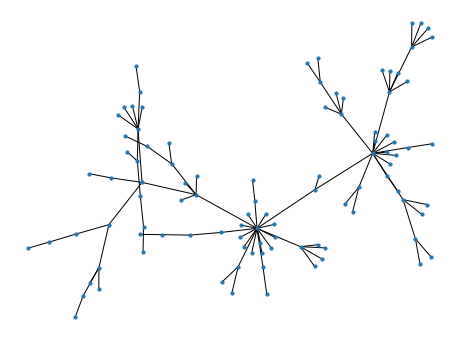

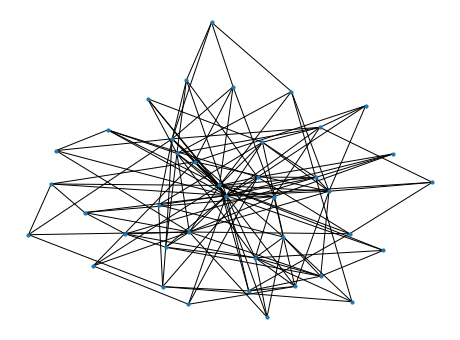

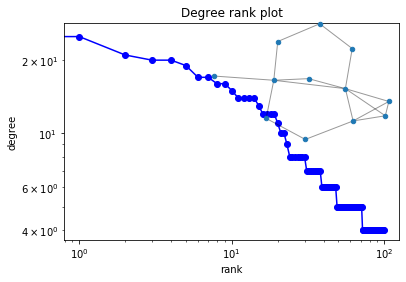

In [7]:
import networkx as nx
import matplotlib.pyplot as plt


n=100 # to see real scale free law choose bigger network 
m1=1 # size of initially connected nodes
m2=4

G_ba1 = nx.barabasi_albert_graph(n, m1)

fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw(G_ba1, node_size=10)
#pos = nx.draw_spectral(G_er)
#pos = nx.kamada_kawai_layout(G_er)
#pos = nx.circular_layout(G_er)# nx.spring_layout(G, iterations=100)
#nx.draw(G_er, pos, font_size=8)
plt.show()

G_ba2 = nx.barabasi_albert_graph(n, m2)

fig, ax = plt.subplots(1, 1, figsize=(8, 6));
pos = nx.circular_layout(G_ba2)# nx.spring_layout(G, iterations=100)
#nx.draw(G_er, pos, font_size=8)
nx.draw(G_er, node_size=10)
plt.show()



degree_sequence = sorted([d for n, d in G_ba2.degree()], reverse=True)
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)


plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

plt.show()

Let us now look at Watts Strogatz graph with different probability p of links. 
Important hint: the best visualisation of such W-S networks is circular layout.

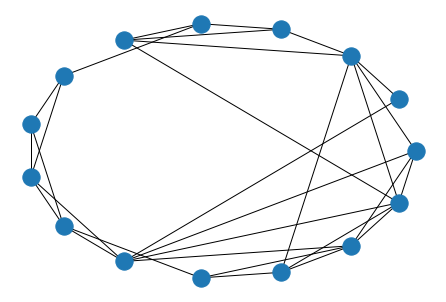

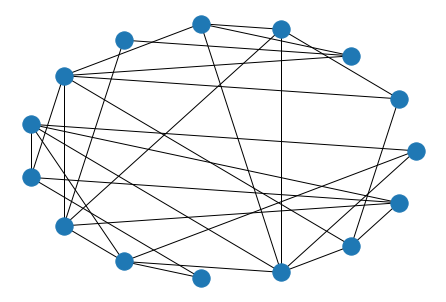

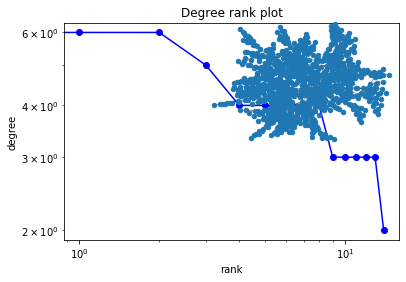

In [14]:

import networkx as nx
import matplotlib.pyplot as plt

n = 15 
k = 4
p1 = 0.1 # probability of links to be revised 
p2 = 0.8 # probability of links to be revised 


G_ws1 = nx.watts_strogatz_graph(n, k, p1)
G_ws2 = nx.watts_strogatz_graph(n, k, p2)
pos1 = nx.circular_layout(G_ws1)
pos2 = nx.circular_layout(G_ws1)
nx.draw(G_ws1, pos1)
plt.show()
nx.draw(G_ws2, pos2)
plt.show()


degree_sequence = sorted([d for n, d in G_ws1.degree()], reverse=True)
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)


plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

plt.show()



# Try yourself 
Please try to play with finding the best visualisation and layout and reading how this layout is visualised or made.
Examples are: 
1. #pos = nx.draw_spectral(G_er)
2. #pos = nx.kamada_kawai_layout(G_er)

## 2. Random geometric graph generation
You can find many different ways of network generations. Some of the most famous are from # Author: Aric Hagberg.
Check others here https://networkx.github.io/documentation/stable/auto_examples/index.html 

Below Erdős-Rényi graph or a binomial graph is shown. 
The $G_{n,p}$ model chooses each of the possible edges with probability $p$.

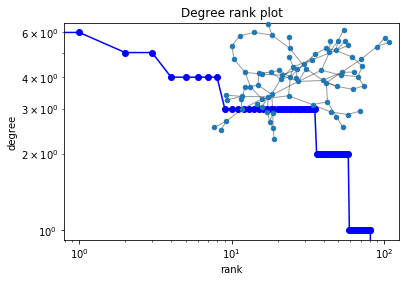

In [5]:

import networkx as nx
import matplotlib.pyplot as plt

G = nx.gnp_random_graph(100, 0.02)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)


plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

plt.show()

# Geometric random graph

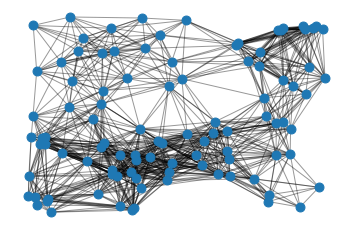

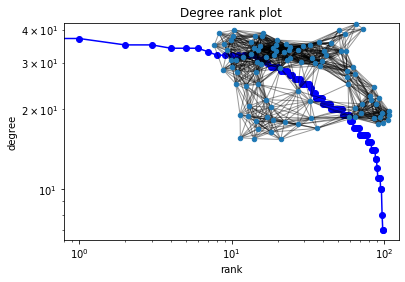

In [2]:

G = nx.random_geometric_graph(100, 0.3)

# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')
#print('position', pos)

dmin =1 # radius between two points
ncenter =0 # position of central node in graph
for n in pos: # we calculate positions of each node in geometric graph
    x,y = pos[n]
    d = (x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter = n
        dmin = d
 
    
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_nodes(G, pos, node_size = 80, 
                       cmap = plt.get_cmap('Reds_r'))



plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()




# Degree sequence of geometric graph 

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# plot clusterng of networks 
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)


plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

plt.show()

## Test yourself
Try generating your own network.

You can also create your own network by 
1. giving to networkx a matrix or edgelist, or adding nodes and links.
2. generating it using predefined network classes

#### Algorithm
1. We first generate a network using matrix, edgelist or load function.
2. Then we visualise this network with the simplest function "draw" https://networkx.github.io/documentation/stable/reference/drawing.html



# 3. Modeling of processes 

One of the most common and the most widely used process for data is random walk. 
Random walk also gives us nice proof and distribution of steps which forms Normal distribution.

Try yourself
What can you try to run on netwokrs?

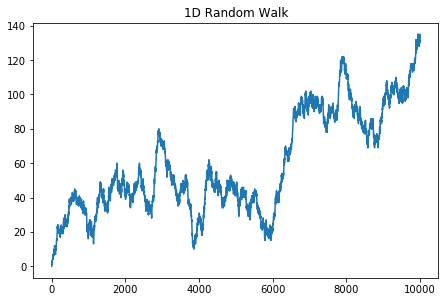

In [1]:

from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt
#colors = cycle(‘bgrcmykbgrcmykbgrcmykbgrcmyk’)
import networkx as nx
import numpy as np

'''
Now let us visualise random walk in 1D
'''
# Define parameters for the walk
dims = 1 #dimension
step_n = 10000 # number of steps
step_set = [-1, 0, 1] # try to change the step set 
size = 10 
sizefig = 10

origin = np.zeros((1,dims))
# Simulate steps in 1D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

# print(steps)
# Plot the random walk path

#fig =  plt.figure(figsize = (8, 8))#plt.figure(figsize=(sizefig,sizefig))
#fig = plt.figure(figsize=(8,4),dpi=200)
#ax = plt.subplot(332)#fig.add_subplot(111)

#ax.scatter(np.arange(step_n+1), path, c=’blue’,alpha=0.25,s=0.05);
plt.plot(path)#,c=’blue’,alpha=0.5,lw=0.5,ls=’ — ‘,);
plt.plot(0, start)#,c=’red’, marker=’+’)
plt.plot(step_n, stop)#, c=’black’, marker=’o’)
plt.title('1D Random Walk')
plt.tight_layout(pad=0)
plt.show()
#plt.savefig('plots/random_walk_1d.png',dpi=250);




# Try yourself 
Let us plot the distribution of jumps around the starting point of random walk (used for predictions of drift in financial time-series, visualisation of time-series non-normality etc.).
